In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder='/content/drive/MyDrive/AiProject/shapes_dataset_augmented3'

In [ ]:
import os
print(os.path.exists("/content/drive/MyDrive/AiProject/shapes_dataset_augmented3"))

True


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

#  CONFIGURATION
dataset_path = "/content/drive/MyDrive/AiProject/shapes_dataset_augmented3"
shape_labels = ['circle', 'square', 'triangle']

# FEATURE EXTRACTION
def extract_features(image):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)#RETR_EXTERNAL: Sadece dış kenarı al.CHAIN_APPROX_SIMPLE: Kenar noktalarını sadeleştir.

    if not contours:
        return None

    cnt = contours[0]
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio = w / h if h != 0 else 0
    rect_area = w * h
    extent = area / rect_area if rect_area != 0 else 0
    hull = cv2.convexHull(cnt)
    hull_area = cv2.contourArea(hull)
    solidity = area / hull_area if hull_area != 0 else 0
    approx = cv2.approxPolyDP(cnt, 0.04 * perimeter, True)
    vertices = len(approx)

    return [area, perimeter, aspect_ratio, extent, solidity,vertices]


LOAD DATASET

In [ ]:
#  LOAD DATASET
features = []
labels = []

for label_index, shape in enumerate(shape_labels):#her şeklin hangi sınıfa ait olduğu sayısal olarak tutulacak.
    shape_dir = os.path.join(dataset_path, shape)#Her şekil için, dataset içindeki ilgili klasör yolu oluşturuluyor.
    for filename in os.listdir(shape_dir):#İlgili klasördeki tüm dosyalar okunuyor.
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            file_path = os.path.join(shape_dir, filename)#Dosyanın tam yolu oluşturuluyor.
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)#Resim gri tonlamalı olarak okunuyor. Renk bilgisine gerek yok, çünkü şekil beyaz-siyah.
            if img is None:
                continue
            _, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)#Görüntü ikili (binary) hale getiriliyor.Piksel değeri 127’nin üstündeyse 255 (beyaz),Altındaysa 0 (siyah) oluyor.

            feat = extract_features(thresh)
            if feat:     #Eğer özellikler başarıyla çıkarılmışsa
                features.append(feat)  #Çıkarılan özellikler features listesine eklenir.
                labels.append(label_index)  #Bu resmin sınıf etiketi (0,1,2 gibi) labels listesine eklenir.




TRAIN MODEL

In [ ]:
# TRAIN MODEL
# Check if features list is empty before converting to numpy array and scaling
if len(features) == 0:
    print("Error: No features were extracted. Cannot train the model.")
else:
    X = np.array(features)  # sayisal numpy ceviriyor
    y = np.array(labels)

    # Scale features
    scaler = StandardScaler()   # normalizasyon
    X_scaled = scaler.fit_transform(X) #  fit_transform =Verinin ortalaması ve standart sapması hesaplanır, Veriler bu değerlere göre dönüştürülür.[X_scaled, ölçeklendirilmiş özellik matrisidir.]

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    print("Data loaded, scaled, and split successfully.") # Debugging print


Data loaded, scaled, and split successfully.


In [ ]:
len(X_train)

1048

In [ ]:
len(X_test)

450

In [ ]:
# Train ANN
clf = MLPClassifier(hidden_layer_sizes=(10, 10),activation ='relu', max_iter=1000, random_state=42)
clf.fit(X_train, y_train)



MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

In [ ]:
# Evaluate
y_pred = clf.predict(X_test)


In [ ]:
y_test

array([2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 2, 2, 1, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 1, 1, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 1, 0,
       0, 2, 2, 2, 2, 2, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 2,
       1, 1, 2, 0, 2, 2, 1, 2, 1, 0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 1,
       0, 2, 1, 1, 0, 0, 1, 2, 0, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 2, 1, 0, 1, 1, 2, 0, 0, 0, 2, 1, 0, 0, 1, 2, 1, 2, 2, 2, 0, 0,
       1, 2, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 1, 0,
       2, 0, 1, 0, 1, 2, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0,
       2, 1, 2, 0, 2, 0, 0, 2, 2, 0, 0, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2,
       0, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 0, 2, 2, 2,
       2, 0, 0, 0, 2, 2, 0, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 0, 1, 0,
       2, 0, 2, 1, 2, 0, 2, 2, 1, 0, 2, 1, 2, 0, 2,

In [ ]:
y_pred

array([2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 2, 2, 1, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 1, 1, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 1, 0,
       0, 2, 2, 2, 2, 2, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 2,
       1, 1, 2, 0, 2, 2, 1, 2, 1, 0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 1,
       0, 2, 1, 1, 0, 0, 1, 2, 0, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 2, 1, 0, 1, 1, 2, 0, 0, 0, 2, 1, 0, 0, 1, 2, 1, 2, 2, 2, 0, 0,
       1, 2, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 1, 0,
       2, 0, 1, 0, 1, 2, 0, 1, 1, 2, 2, 1, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0,
       2, 1, 2, 0, 2, 0, 0, 2, 2, 1, 0, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2,
       0, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 0, 2, 2, 2,
       2, 0, 0, 0, 2, 2, 0, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 0, 1, 0,
       2, 0, 2, 1, 2, 0, 2, 2, 1, 0, 2, 1, 2, 0, 2,

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=shape_labels))


Classification Report:
              precision    recall  f1-score   support

      circle       1.00      0.97      0.99       151
      square       0.96      1.00      0.98       135
    triangle       1.00      0.99      1.00       164

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [ ]:
import matplotlib.pyplot as plt

def predict_and_show_image(path):
    # 1. Görseli gri tonlamalı olarak oku
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Görsel yüklenemedi! Yol doğru mu kontrol et.")
        return

    # 2. Eşikleme (threshold)   Görseli siyah ve beyaz bölgelere ayırarak şekil konturunu netleştirmek
    _, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    # 3. Özellik çıkar
    feat = extract_features(thresh)
    if feat is None:
        print("Özellik çıkarma başarısız.")
        return

    # 4. Özellikleri ölçekle
    feat_scaled = scaler.transform([feat])

    # 5. Tahmin yap
    pred_index = clf.predict(feat_scaled)[0]
    predicted_label = shape_labels[pred_index]

    # 6. Görseli göster
    plt.imshow(img, cmap='gray')
    plt.title(f"Tahmin: {predicted_label}")
    plt.axis('off')
    plt.show()

    # 7. Ayrıca metin olarak da döndür
    return predicted_label


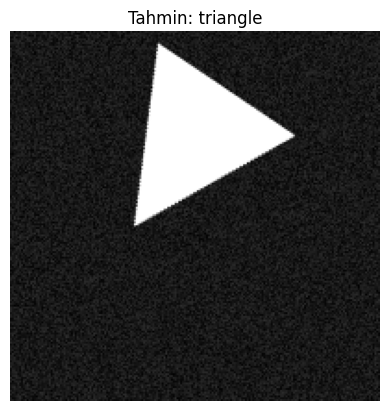

Modelin tahmini: triangle


In [ ]:
image_path = '/content/drive/MyDrive/AiProject/shapes_dataset_augmented3/triangle/triangle_499.png'
result = predict_and_show_image(image_path)
print("Modelin tahmini:", result)